# **Inference on Model with Highest IoU Score**

In [6]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [9]:
import sys
sys.path.append('../')

import os
os.environ['KMP_DUPLICATE_LIB_OK'] = 'TRUE'

import torch
import torch.nn as nn
from torch.utils.data import DataLoader

from src.config import SEED, DEVICE
from src.utils.random import set_seed
from src.utils.visualisations import plot_pre_post_mask
from src.utils.segmentation_train import get_dataloaders
from src.siamese_unet_diff.siamese_unet_diff_train import get_model
from src.data.segmentation_dataset import SegmentationDataset
from src.utils.parser import get_config

DATA_PATH = '../data/'
CONFIG_PATH = '../config/siamese_unet_diff_best_params.yml'
MODEL_LOAD_PATH = f'{DATA_PATH}/best_model/siameseunetdiff.pth'
BATCH_SIZE = 1


set_seed(SEED)

In [10]:
def get_loaded_model(config_path: str = CONFIG_PATH):
    config = get_config(config_path)
    encoder_channels = config["encoder_channels"]
    decoder_channels = config["decoder_channels"]
    dropout_rate = float(config["dropout_rate"])

    model = get_model(
        encoder_channels=encoder_channels,
        decoder_channels=decoder_channels,
        dropout_rate=dropout_rate,
        use_pretrained=False,
        freeze_encoder=False,
    )
    model.load_state_dict(torch.load(MODEL_LOAD_PATH))
    model.eval()

    return model

def get_test_loader():
    _, _, test_loader = get_dataloaders(
        batch_size=BATCH_SIZE,
        use_intact=False,
        with_val=True,
        dataset_class=SegmentationDataset,
    )

    return test_loader

def show_test_prediction(model: nn.Module, test_loader: DataLoader, idx: int = 0):
    # Get test sample
    test_dataset = test_loader.dataset
    pre, post, mask, label = test_dataset[idx]

    pre = pre.unsqueeze(0).to(DEVICE)
    post = post.unsqueeze(0).to(DEVICE)

    # Get Prediction
    pred = model(pre, post).squeeze()
    pred = torch.nn.Sigmoid()(pred).cpu().detach()
    pred = (pred > 0.5).float()

    # To CPU
    pre = pre.squeeze().cpu().detach()
    post = post.squeeze().cpu().detach()

    # Plot
    plot_pre_post_mask(pre, post, mask, label, pred=pred, is_normalised=True, with_title=False)

🔢 Number of learnable parameters: 5,046,769
✅ Train dataloader length: 133
✅ Val dataloader length: 29
✅ Test dataloader length: 28


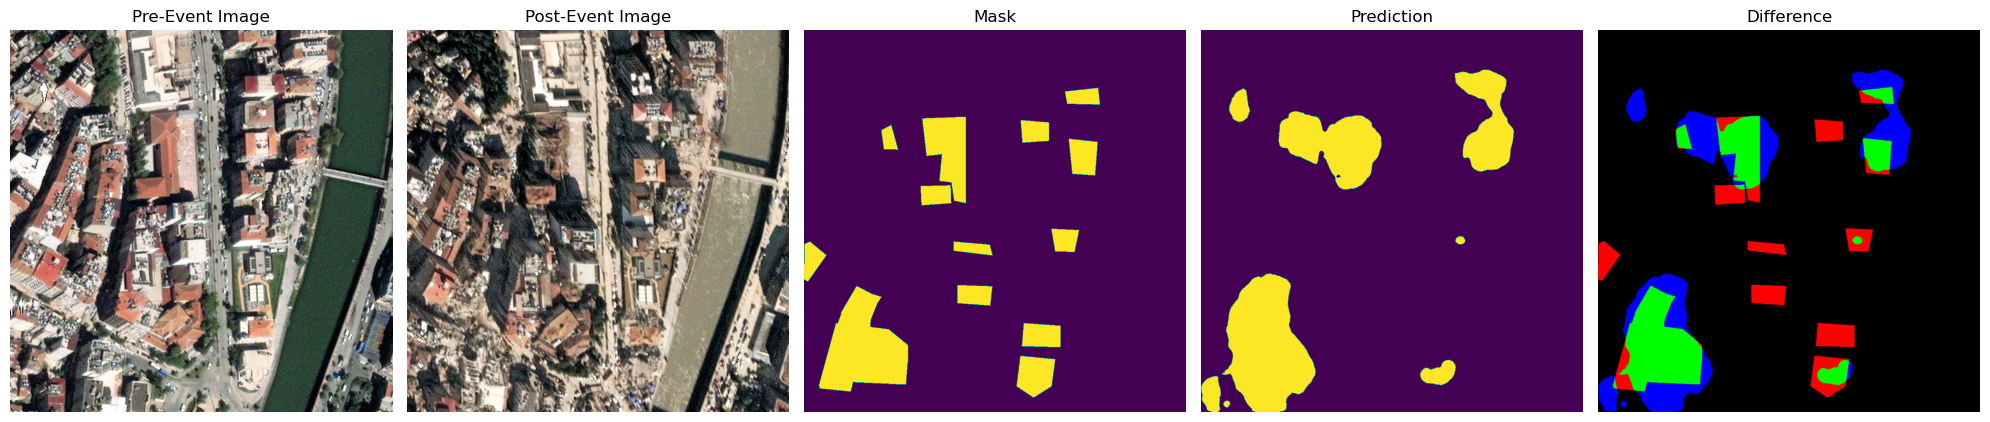

In [11]:
model = get_loaded_model()
test_loader = get_test_loader()
show_test_prediction(model, test_loader, idx=1)

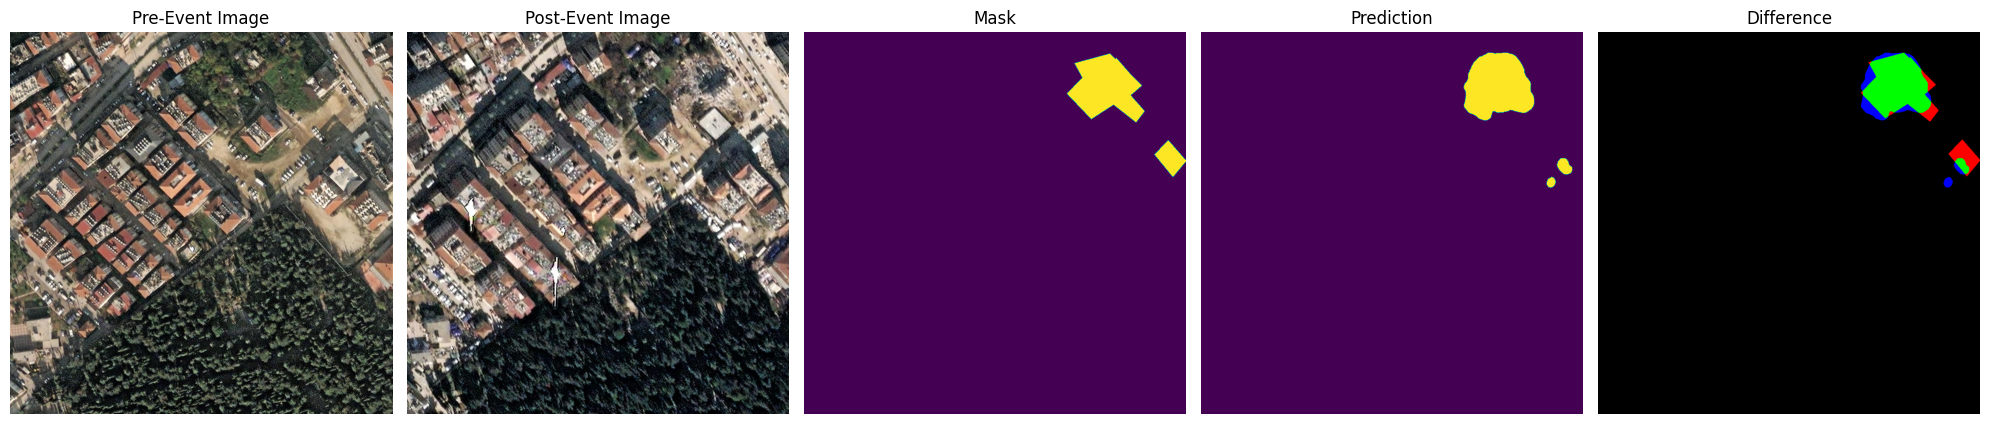

In [27]:
show_test_prediction(model, test_loader, idx=7)

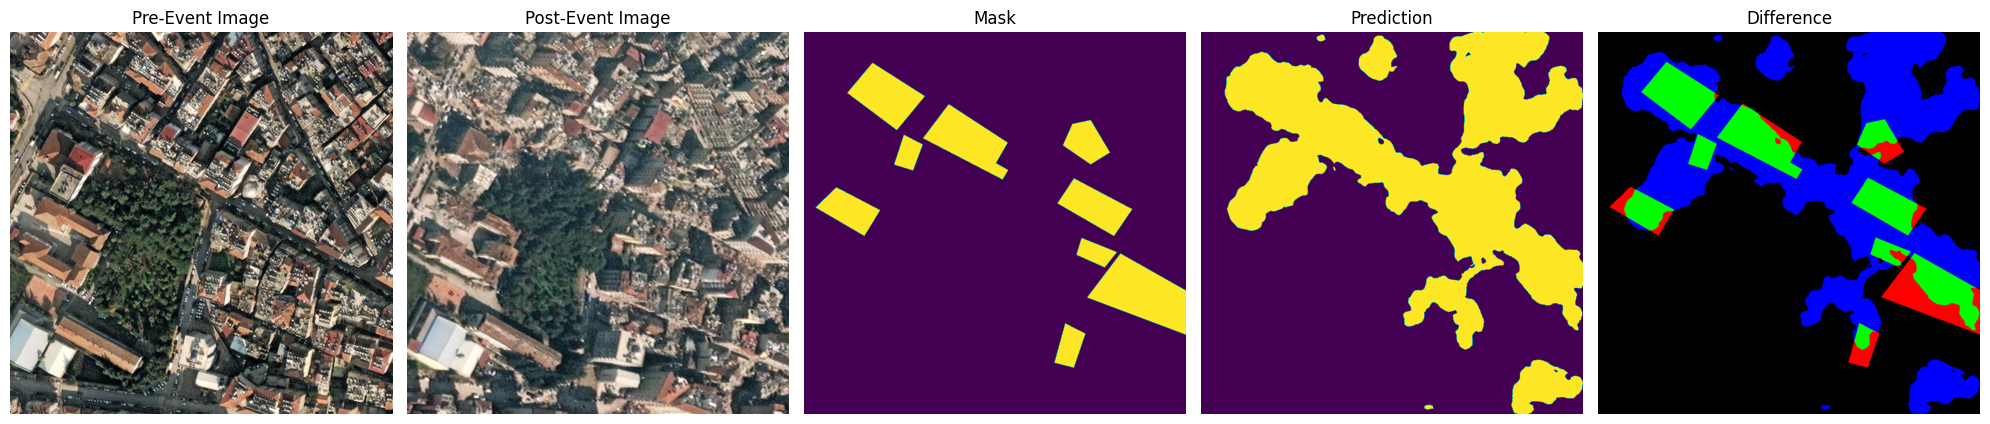

In [28]:
show_test_prediction(model, test_loader, idx=11)

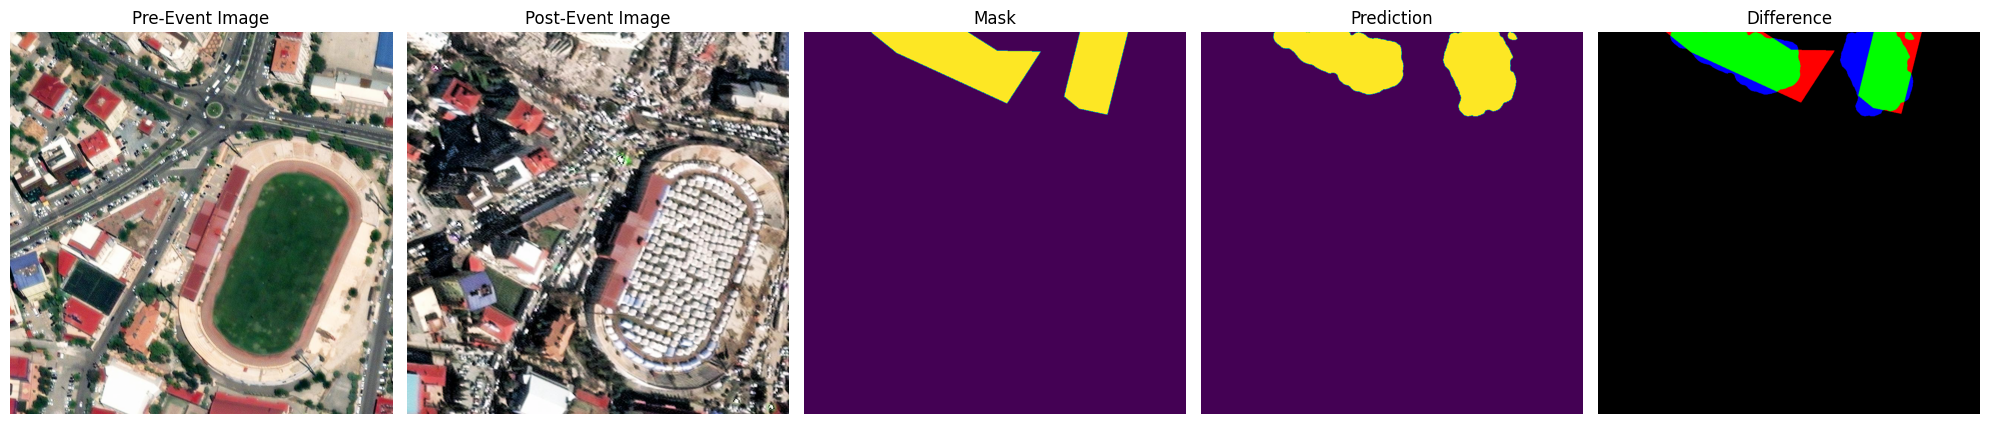

In [29]:
show_test_prediction(model, test_loader, idx=17)

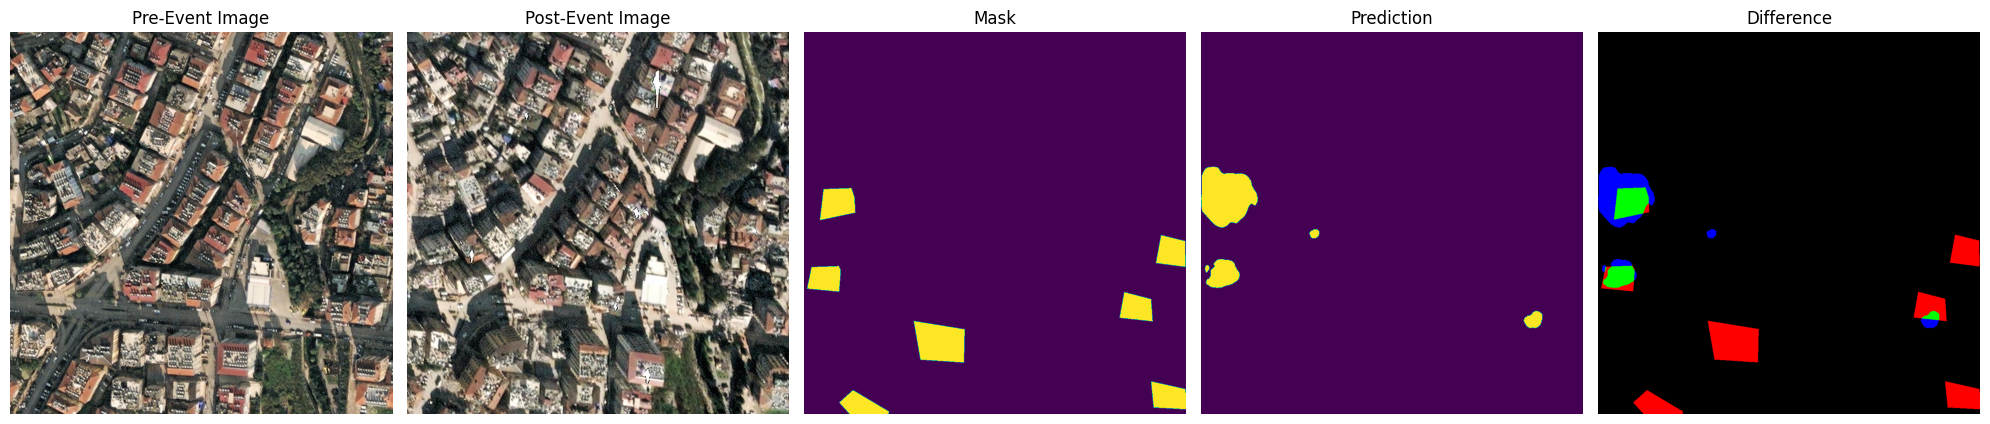

In [30]:
show_test_prediction(model, test_loader, idx=22)

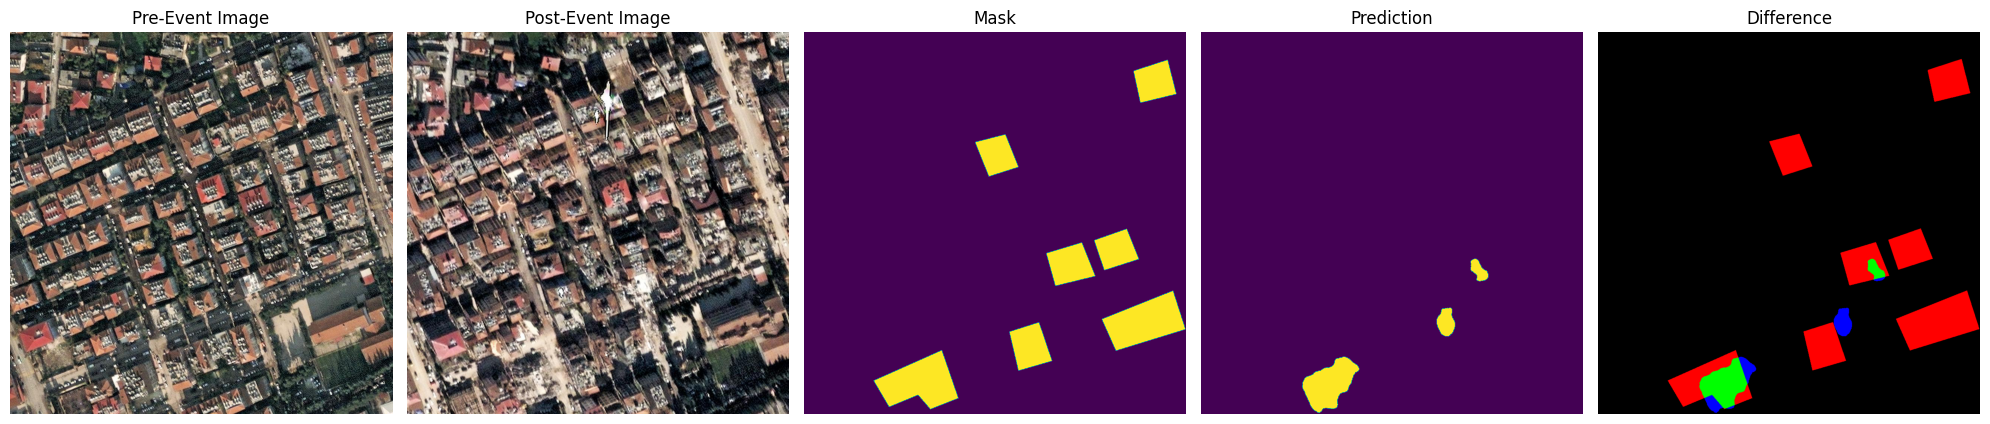

In [31]:
show_test_prediction(model, test_loader, idx=23)

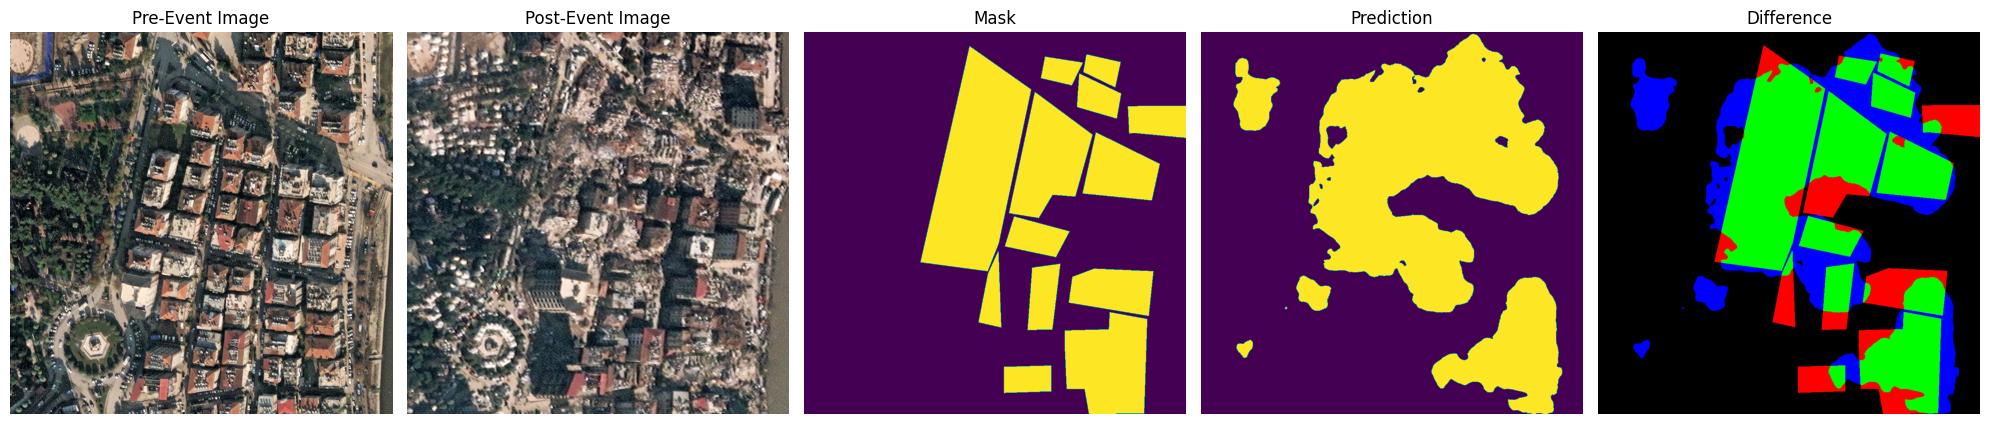

In [32]:
show_test_prediction(model, test_loader, idx=26)